In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

In [2]:
benchmark = pd.read_json('/Users/antoineguiot/model-emulator/emulator/benchmark/benchmark_scorer.json', orient='split')

In [3]:
benchmark_solver =  pd.read_json('/Users/antoineguiot/model-emulator/emulator/benchmark/benchmark_solver.json', orient='split')                                 

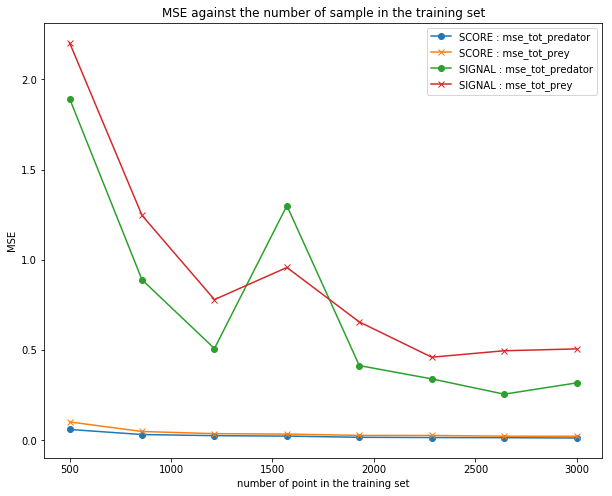

In [4]:
plt.figure(figsize=(10,8))
plt.plot(benchmark['training_set_size'],
         benchmark['mse_predator'],
         label='SCORE : mse_tot_predator',
         marker='o')
plt.plot(benchmark['training_set_size'],
         benchmark['mse_prey'],
         label='SCORE : mse_tot_prey',
         marker='x')


plt.plot(benchmark_solver['training_set_size'],
         benchmark_solver['mse_predator'],
         label='SIGNAL : mse_tot_predator',
         marker='o')
plt.plot(benchmark_solver['training_set_size'],
         benchmark_solver['mse_prey'],
         label='SIGNAL : mse_tot_prey',
         marker='x')

plt.title('MSE against the number of sample in the training set')
plt.xlabel('number of point in the training set')
plt.ylabel('MSE')
plt.legend()

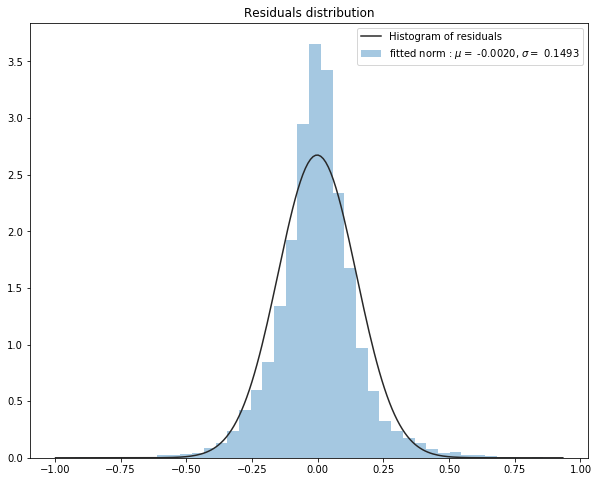

In [5]:
from scipy.stats import norm

model_index = 7
residus = benchmark['residus_prey'].values[model_index]
(mu, sigma) = stats.norm.fit(residus)
mu_print = '{:.4f}'.format(mu)
sigma_print ='{:.4f}'.format(sigma)
plt.figure(figsize=(10,8))
sb.distplot(residus, kde=False, bins = 40, fit=norm)
#plt.xlim(-2, 2)
plt.title('Residuals distribution')
plt.legend(['Histogram of residuals', f'fitted norm : $\mu =$ {mu_print}, $\sigma=$ {sigma_print}'])

In [6]:
sigma_list_solver = []
mu_list_solver=[]
for i in range(8):
    residus = np.array(benchmark_solver['residus_prey'].values[i])
    residus = residus[(residus< np.quantile(residus,0.98)) &  (residus>np.quantile(residus,0.02))]
    (mu, sigma) = stats.norm.fit(residus)
    sigma_list_solver.append(sigma)
    mu_list_solver.append(mu)




sigma_list = []
mu_list=[]
for i in range(8):
    residus = np.array(benchmark['residus_prey'].values[i])
    residus = residus[(residus< np.quantile(residus,0.98)) &  (residus>np.quantile(residus,0.02))]
    (mu, sigma) = stats.norm.fit(residus)
    sigma_list.append(sigma)
    mu_list.append(mu)
plt.figure(figsize=(10,8))
plt.title('$\sigma$ against number of point in the training set')
plt.xlabel('number of point in the training set')
plt.ylabel('$\sigma$')
plt.plot(benchmark.training_set_size, sigma_list, label='Scores',marker='*')
plt.plot(benchmark_solver.training_set_size, sigma_list_solver, label= 'signals', marker ='o')
plt.legend()

NameError: name 'np' is not defined

In [ ]:
plt.figure(figsize=(10,8))
plt.title('$\mu$ against number of point in the training set')
plt.xlabel('number of point in the training set')
plt.ylabel('$\mu$')
plt.plot(benchmark.training_set_size, mu_list, marker='*')

In [ ]:
model_index = 7

In [ ]:
t_series_index =38
y_true = benchmark['true_predator'].values[model_index][t_series_index]
y_pred = benchmark['predict_predator'].values[model_index][t_series_index]

In [ ]:
time = np.linspace(0,30,16)

plt.plot(time,y_true, label='true',marker='o')
plt.plot(time, y_pred, label='prediction', marker='x')
plt.xlabel('Time (s)')
plt.ylabel('$S_{prey}(t)$')
plt.legend()

In [ ]:
import json
patient_id = 11
with open(f"/Users/antoineguiot/model-emulator/emulator/outputs/Evaluation.json") as json_file:
    evaluations = json.load(json_file)
row_data_frame = pd.DataFrame()
row_patient_discarded_values = pd.DataFrame()
d = evaluations['exploPatients'][patient_id]['scores']

v = {k: [dic[k] for dic in d] for k in d[0]}['value']
k = int(len(v) / 2)
y_prey=  v[0:k]# [v[j * k:(j + 1) * k]]

In [ ]:
with open(f"/Users/antoineguiot/model-emulator/emulator/outputs/Patient-{patient_id}.json") as json_file:
    patient_res = json.load(json_file)

y_prey_t_series = [patient_res[f"DefaultComp.prey"]["resVals"]]

In [ ]:
time = np.linspace(0,30,16)
plt.plot(time,y_prey)

plt.title('Scores for Prey')
plt.xlabel('Time (s)')
plt.ylabel('Scores')

In [7]:
import numpy as np
time = np.linspace(0,30,61)
plt.plot(time, y_prey_t_series[0])
plt.title('$y_{prey}(t)$')
plt.xlabel('Time (s)')
plt.ylabel('$y_{prey}(t)$')

NameError: name 'y_prey_t_series' is not defined

In [8]:
np.mean(np.stack(benchmark_solver.residus_prey.values),axis=0)

array([ 0.17649322,  0.23741844,  0.1577134 , ..., -0.33880232,
       -0.38575751, -0.41418726])

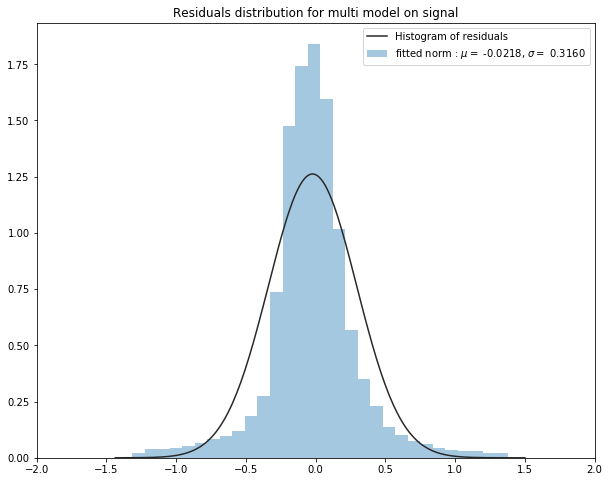

In [9]:
from scipy.stats import norm

residus = np.mean(np.stack(benchmark_solver.residus_prey.values),axis=0)


#residus = np.array(benchmark_solver['residus_prey'].values[1])

residus = residus[(residus< np.quantile(residus,0.98)) &  (residus>np.quantile(residus,0.02))]


(mu, sigma) = stats.norm.fit(residus)
mu_print = '{:.4f}'.format(mu)
sigma_print ='{:.4f}'.format(sigma)
plt.figure(figsize=(10,8))
sb.distplot(residus, kde=False, bins = 30, fit=norm)
plt.xlim(-2, 2)
plt.title('Residuals distribution for multi model on signal')
plt.legend(['Histogram of residuals', f'fitted norm : $\mu =$ {mu_print}, $\sigma=$ {sigma_print}'])

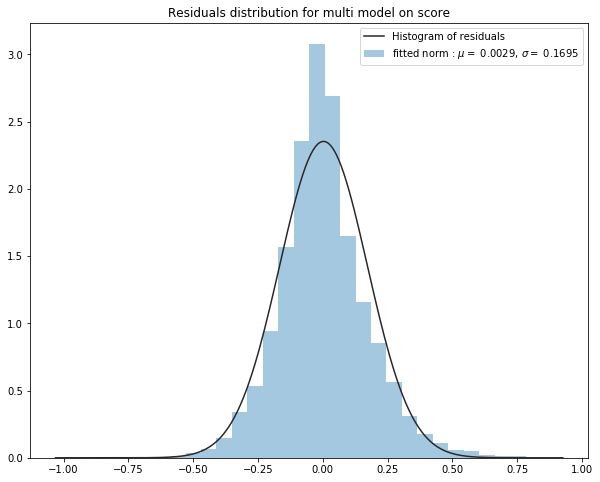

In [23]:
from scipy.stats import norm

residus_prey = np.mean(np.stack(benchmark.residus_prey.values),axis=0)
residus_predator = np.mean(np.stack(benchmark.residus_predator.values),axis=0)



#residus = np.array(benchmark_solver['residus_prey'].values[1])

#residus = residus[(residus< np.quantile(residus,0.98)) &  (residus>np.quantile(residus,0.02))]


(mu, sigma) = stats.norm.fit(residus_prey)
mu_print = '{:.4f}'.format(mu)
sigma_print ='{:.4f}'.format(sigma)
plt.figure(figsize=(10,8))
sb.distplot(residus_prey, kde=False, bins = 30, fit=norm)
#plt.xlim(-2, 2)
plt.title('Residuals distribution for multi model on score')
plt.legend(['Histogram of residuals', f'fitted norm : $\mu =$ {mu_print}, $\sigma=$ {sigma_print}'])

In [31]:
np.sum(residus_predator**2)/len(residus_predator)

0.015526609137527049

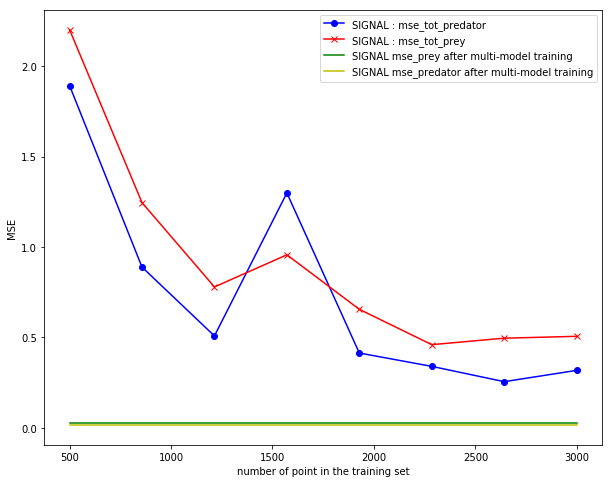

In [29]:
plt.figure(figsize=(10,8))
#plt.plot(benchmark['training_set_size'],
#         benchmark['mse_predator'],
#         label='SCORE : mse_tot_predator',
#         marker='o')
#plt.plot(benchmark['training_set_size'],
#         benchmark['mse_prey'],
#         label='SCORE : mse_tot_prey',
#         marker='x')


plt.plot(benchmark_solver['training_set_size'],
         benchmark_solver['mse_predator'],
         label='SIGNAL : mse_tot_predator',
         marker='o',
        color = 'b')
plt.plot(benchmark_solver['training_set_size'],
         benchmark_solver['mse_prey'],
         label='SIGNAL : mse_tot_prey',
         marker='x',
        color = 'r')

plt.plot(benchmark_solver['training_set_size'],
         [np.sum(residus_prey**2)/len(residus_prey)]*8,
        label = 'SIGNAL mse_prey after multi-model training',
         color = 'g'
        )

plt.plot(benchmark_solver['training_set_size'],
         [np.sum(residus_predator**2)/len(residus_predator)]*8,
        label = 'SIGNAL mse_predator after multi-model training',
         color = 'y'
        )

plt.xlabel('number of point in the training set')
plt.ylabel('MSE')
plt.legend()

In [30]:
benchmark_solver

,mse_prey,residus_prey,predict_prey,true_prey,mse_predator,residus_predator,predict_predator,true_predator,training_set_size
0,2.202665,"[0.5097190479, 0.6403086151, 0.8178870946, 0.8...","[[0.2697860301, 0.2435470968, 0.15317964550000...","[[0.779505078, 0.8838557119, 0.9710667401, 1.0...",1.893389,"[-0.1861060936, -0.14236894290000002, -0.13816...","[[0.8895127773, 0.9553414583000001, 1.10933542...","[[0.7034066837, 0.8129725154, 0.9711739928, 1....",500
1,1.245967,"[0.22533560200000002, 0.2913086528, 0.19556256...","[[0.554169476, 0.5925470591, 0.7755041718, 0.8...","[[0.779505078, 0.8838557119, 0.9710667401, 1.0...",0.889263,"[0.08774100950000001, 0.058845847400000005, 0....","[[0.6156656742000001, 0.7541266680000001, 0.81...","[[0.7034066837, 0.8129725154, 0.9711739928, 1....",857
2,0.779422,"[0.1027143637, 0.1620679016, 0.0180557042, 0.0...","[[0.6767907143, 0.7217878103, 0.9530110359, 0....","[[0.779505078, 0.8838557119, 0.9710667401, 1.0...",0.508370,"[-0.1157764275, -0.0079165403, 0.058849445, 0....","[[0.8191831112, 0.8208890557, 0.9123245478, 1....","[[0.7034066837, 0.8129725154, 0.9711739928, 1....",1214
3,0.957316,"[0.0764964263, 0.1108994598, -0.0379981727, -0...","[[0.7030086517, 0.7729562521000001, 1.00906491...","[[0.779505078, 0.8838557119, 0.9710667401, 1.0...",1.299573,"[-0.30318427870000003, -0.5199256246, -0.46942...","[[1.0065909624, 1.33289814, 1.4405958652, 1.78...","[[0.7034066837, 0.8129725154, 0.9711739928, 1....",1571
4,0.655622,"[0.1267603676, 0.18380655, 0.0409295827, 0.064...","[[0.6527447104, 0.7000491619, 0.9301371574, 0....","[[0.779505078, 0.8838557119, 0.9710667401, 1.0...",0.413852,"[-0.0649671633, -0.0880472962, 0.0758746773, -...","[[0.768373847, 0.9010198116, 0.895299315500000...","[[0.7034066837, 0.8129725154, 0.9711739928, 1....",1928
5,0.460216,"[0.0767331759, 0.1306595916, -0.008253488, -0....","[[0.7027719021000001, 0.7531961203, 0.97932022...","[[0.779505078, 0.8838557119, 0.9710667401, 1.0...",0.340106,"[-0.1066571553, 0.0026807483000000003, 0.00480...","[[0.810063839, 0.8102917671000001, 0.966371178...","[[0.7034066837, 0.8129725154, 0.9711739928, 1....",2285
6,0.495971,"[0.1827361027, 0.22617901510000002, 0.13653841...","[[0.5967689753000001, 0.6576766968000001, 0.83...","[[0.779505078, 0.8838557119, 0.9710667401, 1.0...",0.255458,"[0.056430391600000004, -0.0142242019, 0.229925...","[[0.6469762921000001, 0.8271967173, 0.74124884...","[[0.7034066837, 0.8129725154, 0.9711739928, 1....",2642
7,0.506304,"[0.1114506761, 0.1541177148, 0.098985460300000...","[[0.6680544019, 0.7297379971, 0.8720812798, 0....","[[0.779505078, 0.8838557119, 0.9710667401, 1.0...",0.318033,"[0.2078937512, 0.1361739929, 0.312411061000000...","[[0.4955129325, 0.6767985225, 0.6587629318, 0....","[[0.7034066837, 0.8129725154, 0.9711739928, 1....",3000
